# Different epitopes
Up to now, we've worked with Influenza A virus (GILGFVFTL). Let's take a look at the performance in different epitopes.

We're working with the [vdjdb-db](https://github.com/antigenomics/vdjdb-db/releases) dataset.

In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb.txt', sep='\t')
df_vdjdb.head()
# sample 10 items


,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no


In [2]:
#  Print random
df_vdjdb.sample(10)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
4247,0,TRB,CASSIEAGGTDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-A*02,B2M,MHCI,LLLGIGILV,...,HomoSapiens,https://github.com/antigenomics/vdjdb-db/issue...,"{""frequency"": ""0.23%"", ""identification"": ""tetr...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CASSIEAGGTDTQYF"", ""cdr3_old"": ""CASSI...",0,sort,amplicon,no,no
43882,11523,TRB,CASSLGDYYNEQFF,TRBV27*01,TRBJ2-1*01,HomoSapiens,HLA-A*11:01,B2M,MHCI,AVFDRKSDAK,...,EBV,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/25584"", ""identification"": ""de...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CASSLGDYYNEQFF"", ""cdr3_old"": ""CASSLG...",0,sort,singlecell,no,no
66218,22691,TRB,CASSQEAPGQGDTGELFF,TRBV4-3*01,TRBJ2-2*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,...,CMV,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/4761"", ""identification"": ""dex...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CASSQEAPGQGDTGELFF"", ""cdr3_old"": ""CA...",0,sort,singlecell,no,no
54487,16826,TRA,CAMRGPISGGYNKLIF,TRAV14/DV4*01,TRAJ4*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,...,CMV,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/25584"", ""identification"": ""de...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAMRGPISGGYNKLIF"", ""cdr3_old"": ""CAMR...",0,sort,singlecell,no,no
85894,28341,TRA,CVVRFNDMRF,TRAV8-2*01,TRAJ43*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,GLFKDCSKV,...,SARS-CoV-2,PMID:34793243,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CVVRFNDMRF"", ""cdr3_old"": ""CVVRFNDMRF...",0,sort,singlecell,no,no
84088,27591,TRA,CAGPIEGWSQGNLIF,TRAV25*01,TRAJ42*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,GILGFVFTL,...,InfluenzaA,PMID:34793243,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAGPIEGWSQGNLIF"", ""cdr3_old"": ""CAGPI...",0,sort,singlecell,no,no
15081,0,TRA,CAYMDGTASKLTF,TRAV38-2/DV8*01,TRAJ44*01,HomoSapiens,HLA-A*02,B2M,MHCI,GILGFVFTL,...,InfluenzaA,PMID:28423320,"{""frequency"": ""0.0002%"", ""identification"": ""an...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYMDGTASKLTF"", ""cdr3_old"": ""CAYMDGT...",0,sort,amplicon,no,no
38173,8669,TRA,CALSESGSSNTGKLIF,TRAV19*01,TRAJ37*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,...,CMV,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/33921"", ""identification"": ""de...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CALSESGSSNTGKLIF"", ""cdr3_old"": ""CALS...",0,sort,singlecell,no,no
55819,17492,TRA,CAVSETTDKLIF,TRAV8-6*01,TRAJ34*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,...,CMV,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/25584"", ""identification"": ""de...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAVSETTDKLIF"", ""cdr3_old"": ""CAVSETTD...",0,sort,singlecell,no,no
75621,25946,TRA,CAALFTGGGNKLTF,TRAV21*01,TRAJ10*01,HomoSapiens,HLA-A*01:01,B2M,MHCI,LTDEMIAQY,...,SARS-CoV-2,https://github.com/antigenomics/vdjdb-db/issue...,"{""frequency"": """", ""identification"": ""dextramer...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAALFTGGGNKLTF"", ""cdr3_old"": ""CAALFT...",0,sort,singlecell,no,no


In [3]:
# Get the number of unique antigen.epitope
epitopes = df_vdjdb['antigen.epitope'].unique()
print(f'Number of unique epitopes: {len(epitopes)}')

Number of unique epitopes: 1150


In [4]:
# Get the top 10 epitopes
epitope_counts = df_vdjdb['antigen.epitope'].value_counts()
epitope_counts.head(10)

KLGGALQAK     27948
GILGFVFTL     10024
NLVPMVATV      7959
AVFDRKSDAK     3546
RAKFKQLL       2733
ELAGIGILTV     2687
GLCTLVAML      1844
YLQPRTFLL      1683
IVTDFSVIK      1486
SSYRRPVGI      1322
Name: antigen.epitope, dtype: int64

In [5]:
complex_id_counts = df_vdjdb['complex.id'].value_counts()
complex_id_counts.head(10)

0        30789
19521        2
19519        2
19518        2
19517        2
19516        2
19515        2
19514        2
19513        2
19512        2
Name: complex.id, dtype: int64

Except for 0, they all occur at most twice, so I guess same complex means the alpha and beta belong together.

In [6]:
top_10_epitopes = epitope_counts.index[:10]

In [7]:
epitope = "KLGGALQAK"

In [8]:
import pandas as pd

test_data = {"cid": [1, 1, 2, 3],
             "type": ["A", "B", "B", "A"],
             "v": [1, 2, 3, 4]}
test_df = pd.DataFrame(test_data)
test_df

,cid,type,v
0,1,A,1
1,1,B,2
2,2,B,3
3,3,A,4


In [9]:
test_df_a = test_df[test_df["type"] == "A"]
test_df_b = test_df[test_df["type"] == "B"]

# df_new = test_df_a.join(test_df_b, on="cid", how="outer", lsuffix="_A", rsuffix="_B")
df_new = test_df_a.merge(test_df_b, on="cid", how="outer", suffixes=("_A", "_B"))
df_new

,cid,type_A,v_A,type_B,v_B
0,1,A,1.0,B,2.0
1,3,A,4.0,NaN,NaN
2,2,NaN,NaN,B,3.0


In [10]:
df_vdjdb_cid_0 = df_vdjdb[df_vdjdb["complex.id"] == 0]
df_vdjdb_no_cid_0 = df_vdjdb.drop(df_vdjdb[df_vdjdb["complex.id"] == 0].index)

df_tra = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRA"]
df_trb = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRB"]

df_new = df_tra.merge(df_trb, on="complex.id", how="outer", suffixes=("_alfa", "_beta"))
df_new.head()

,complex.id,gene_alfa,cdr3_alfa,v.segm_alfa,j.segm_alfa,species_alfa,mhc.a_alfa,mhc.b_alfa,mhc.class_alfa,antigen.epitope_alfa,...,antigen.species_beta,reference.id_beta,method_beta,meta_beta,cdr3fix_beta,vdjdb.score_beta,web.method_beta,web.method.seq_beta,web.cdr3fix.nc_beta,web.cdr3fix.unmp_beta
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
2,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no
4,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEQGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no


Gemiddelde
bij
random
forest
Onehot
encode
family
en / of
geheel, niet
version
Nearesgt
neighbors
van
5
betas, daarvoor
gemiddelde
alfas
RF
tree
alle
takken
en
gemiddelde, eerst
gewone in Python
Diff
epitope: vdjdb_full
bevat
al
gecombineerd, niet
zelf
incompleet
maken.Dat
er
een
verschil is tussen
complete
incompleet
maken
zeker
vermelden in thesis

Gemiddelde bij random forest Onehot encode family en / of geheel, niet version Nearesgt neighbors van 5 betas, daarvoor gemiddelde alfas RF tree alle takken en gemiddelde, eerst gewone in Python Diff epitope: vdjdb_full bevat al gecombineerd, niet zelf incompleet maken.Dat er een verschil is tussen complete incompleet maken zeker vermelden in thesis

Except for 0, they all occur at most twice, so I guess same complex means the alpha and beta belong together.

In [ ]:
top_10_epitopes = epitope_counts.index[:10]

In [ ]:
epitope = "KLGGALQAK"

In [ ]:
import pandas as pd

test_data = {"cid": [1, 1, 2, 3],
             "type": ["A", "B", "B", "A"],
             "v": [1, 2, 3, 4]}
test_df = pd.DataFrame(test_data)
test_df

In [ ]:
test_df_a = test_df[test_df["type"] == "A"]
test_df_b = test_df[test_df["type"] == "B"]

# df_new = test_df_a.join(test_df_b, on="cid", how="outer", lsuffix="_A", rsuffix="_B")
df_new = test_df_a.merge(test_df_b, on="cid", how="outer", suffixes=("_A", "_B"))
df_new

In [ ]:
df_vdjdb_cid_0 = df_vdjdb[df_vdjdb["complex.id"] == 0]
df_vdjdb_no_cid_0 = df_vdjdb.drop(df_vdjdb[df_vdjdb["complex.id"] == 0].index)

df_tra = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRA"]
df_trb = df_vdjdb_no_cid_0[df_vdjdb_no_cid_0["gene"] == "TRB"]

df_new = df_tra.merge(df_trb, on="complex.id", how="outer", suffixes=("_alfa", "_beta"))
df_new.head()

Gemiddelde bij random forest
Onehot encode family en/of geheel, niet version -> OK (Notebook 15 overzicht van resultaten, beste mss wel nog standard gebruiken in de data.py? Resultaten zijn geensignificant verschil)
Nearesgt neighbors van 5 betas, daarvoor gemiddelde alfas -> OK (resultaten ni echt een verbetering eigenlijk)
RF tree alle takken en gemiddelde, eerst gewone in Python
Diff epitope: vdjdb_full bevat al gecombineerd, niet zelf incompleet maken. Dat er een verschil is tussen complete incompleet maken zeker vermelden in thesis

Appearently I don't need to combine the datasets myself, vdjdb_full already contains the combined data, so let's continue with that.

In [1]:
import pandas as pd

df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')
df_vdjdb.head()

C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (20,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,NaN,"{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2


In [2]:
rename_columns = {
    'antigen.epitope': 'epitope',
    'cdr3.alpha': 'CDR3_alfa',
    'v.alpha': 'TRAV',
    'j.alpha': 'TRAJ',
    'cdr3.beta': 'CDR3_beta',
    'v.beta': 'TRBV',
    'j.beta': 'TRBJ',
}

df_vdjdb = df_vdjdb.rename(columns=rename_columns)
df_vdjdb = df_vdjdb[rename_columns.values()]
df_vdjdb.head()

,epitope,CDR3_alfa,TRAV,TRAJ,CDR3_beta,TRBV,TRBJ
0,FLKEKGGL,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01
1,FLKEKGGL,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01
2,FLKEKGGL,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01
3,FLKEKGGL,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01
4,FLKEKGGL,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01


In [3]:
# Get the number of unique antigen.epitope
epitopes = df_vdjdb['epitope'].unique()
print(f'Number of unique epitopes: {len(epitopes)}')

# Get the top 10 most occuring epitopes
epitope_counts = df_vdjdb['epitope'].value_counts()
most_occuring_epitopes = epitope_counts.head(10)
most_occuring_epitopes

Number of unique epitopes: 1150


KLGGALQAK     13974
GILGFVFTL      7830
NLVPMVATV      7392
ELAGIGILTV     2284
AVFDRKSDAK     1782
RAKFKQLL       1498
GLCTLVAML      1463
YLQPRTFLL      1326
TTPESANL        960
CTPYDINQM       847
Name: epitope, dtype: int64

In [4]:
current_epitope = "KLGGALQAK"
# Need to try another epitope, since with this epitope, I get:
#  Positive samples: alpha only: 0, beta only: 0, both: 13974, none: 0
#  Negative samples: alpha only: 6712, beta only: 23171, both: 10904, none: 0
# So there aren't enough negative complete samples to get the same distributions
# A possible solution would be to drop some positive samples,
#  however, I didn't do that, since there are no missing samples, so this epitope is irrelevant for the thesis

# heeft problemnin dataset, wel als negatief

In [5]:
current_epitope = "GILGFVFTL"

positive_samples = df_vdjdb[df_vdjdb['epitope'] == current_epitope]
negative_samples = df_vdjdb[df_vdjdb['epitope'] != current_epitope]


# Remove items from negative_samples that are in positive_samples
def remove_items_occuring_in_other_column(df1, column_to_remove, df2, column_to_check):
    """Remove all items from column_to_remove that occur in column_to_check"""
    items_to_remove = df2[column_to_check].unique()

    # remove NaN values
    items_to_remove = items_to_remove[~pd.isnull(items_to_remove)]

    df = df1[~df1[column_to_remove].isin(items_to_remove)]
    return df


def remove_negative_positive_cdr3_overlap(negative_samples, positive_samples):
    previous_len = len(negative_samples)

    negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_alfa', positive_samples,
                                                             'CDR3_alfa')
    negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_beta', positive_samples,
                                                             'CDR3_beta')

    # TOASK: Are the options below possible (Number of negative samples changed from 52225 to 24444 for GIL)
    # negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_alfa', positive_samples,
    #                                                          'CDR3_beta')
    # negative_samples = remove_items_occuring_in_other_column(negative_samples, 'CDR3_beta', positive_samples,
    #                                                          'CDR3_alfa')

    if len(negative_samples) != previous_len:
        print(f'Number of negative samples changed from {previous_len} to {len(negative_samples)}')

    return negative_samples

In [11]:
negative_samples = remove_negative_positive_cdr3_overlap(negative_samples, positive_samples)

Number of negative samples changed from 52225 to 49395


In [6]:
# get the counts of positive dataset containing alpha, beta and both (so the number of columns where it's not NaN)
def filter_df(df, alpha_not_nan, beta_not_nan):
    alpha_condition = df['CDR3_alfa'].notna() if alpha_not_nan else df['CDR3_alfa'].isna()
    beta_condition = df['CDR3_beta'].notna() if beta_not_nan else df['CDR3_beta'].isna()
    return df[alpha_condition & beta_condition]


def get_counts(positive_samples):
    alpha_only_count_pos = len(filter_df(positive_samples, alpha_not_nan=True, beta_not_nan=False))
    beta_only_count_pos = len(filter_df(positive_samples, alpha_not_nan=False, beta_not_nan=True))
    both_count_pos = len(filter_df(positive_samples, alpha_not_nan=True, beta_not_nan=True))
    non_count_pos = len(filter_df(positive_samples, alpha_not_nan=False, beta_not_nan=False))
    return alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos

In [13]:
alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)
print(
    f'Positive samples: alpha only: {alpha_only_count_pos}, beta only: {beta_only_count_pos}, both: {both_count_pos}, none: {non_count_pos}')

Positive samples: alpha only: 2580, beta only: 3056, both: 2194, none: 0


In [7]:
def get_negative_subsets(negative_samples):
    negative_alpha_only = filter_df(negative_samples, alpha_not_nan=True, beta_not_nan=False)
    negative_beta_only = filter_df(negative_samples, alpha_not_nan=False, beta_not_nan=True)
    negative_both = filter_df(negative_samples, alpha_not_nan=True, beta_not_nan=True)
    negative_none = filter_df(negative_samples, alpha_not_nan=False, beta_not_nan=False)
    return negative_alpha_only, negative_beta_only, negative_both, negative_none


In [ ]:

negative_alpha_only, negative_beta_only, negative_both, negative_none = get_negative_subsets(negative_samples)

print(
    f'Negative samples: alpha only: {len(negative_alpha_only)}, beta only: {len(negative_beta_only)}, both: {len(negative_both)}, none: {len(negative_none)}')

In [8]:
# Create a custom exception for when there are not enough samples
class NotEnoughSamplesException(Exception):
    pass


def get_negative_df(negative_alpha_only, negative_beta_only, negative_both, negative_none,
                    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos):
    try:
        # Sample the negative samples to the same size as the positive samples
        negative_df_alpha_only = negative_alpha_only.sample(n=alpha_only_count_pos, random_state=42)
        negative_df_beta_only = negative_beta_only.sample(n=beta_only_count_pos, random_state=42)
        negative_df_both = negative_both.sample(n=both_count_pos, random_state=42)
        negative_df_none = negative_none.sample(n=non_count_pos, random_state=42)
    except ValueError:
        print('Not enough negative samples to sample from')
        raise NotEnoughSamplesException()

    negative_df = pd.concat([negative_df_alpha_only, negative_df_beta_only, negative_df_both, negative_df_none])
    return negative_df

In [16]:
negative_df = get_negative_df(negative_alpha_only, negative_beta_only, negative_both, negative_none,
                              alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos)

In [ ]:
def combine_and_shuffle(positive_samples, negative_df):
    # Combine positive_samples and negative_df and shuffle
    df = pd.concat([positive_samples, negative_df])
    df['reaction'] = df['epitope'].apply(lambda x: 1 if x == current_epitope else 0)
    df = df.drop(columns=['epitope'])
    df = df.sample(frac=1, random_state=42)
    return df


In [ ]:
df = combine_and_shuffle(positive_samples, negative_df)

In [13]:
from util import split_gene_in_columns

In [ ]:
split_gene_in_columns(df)
df.head()

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
test = test.dropna()

In [20]:
train.head()

,CDR3_alfa,TRAV,TRAJ,CDR3_beta,TRBV,TRBJ,reaction,TRAJ_family,TRAJ_version,TRAV_family,TRAV_version,TRBV_family,TRBV_version,TRBJ_family,TRBJ_version
52011,NaN,NaN,NaN,CASSWDRGDGDTQYF,TRBV28*01,TRBJ2-3*01,0,NaN,NaN,NaN,NaN,TRBV28,1,TRBJ2,3
24482,CAVSSDNTGKLIF,TRAV8-6*01,TRAJ37*01,CASSIRSNYEQYF,TRBV19*01,TRBJ2-7*01,1,TRAJ37,1,TRAV8,6,TRBV19,1,TRBJ2,7
15023,NaN,NaN,NaN,CASSIGAWGYTF,TRBV19*01,TRBJ1-2*01,1,NaN,NaN,NaN,NaN,TRBV19,1,TRBJ1,2
21905,CARDDRKLIW,TRAV24*01,TRAJ38*01,NaN,NaN,NaN,0,TRAJ38,1,TRAV24,1,NaN,NaN,NaN,NaN
7594,CAETYNFNKFYF,TRAV13-2*01,TRAJ21*01,NaN,NaN,NaN,0,TRAJ21,1,TRAV13,2,NaN,NaN,NaN,NaN


In [21]:
from util import get_features, fix_test

train_y = train['reaction']
test_y = test['reaction']
train_x = get_features(train)
test_x = get_features(test, test=True)
test_x = fix_test(test_x, train_x.columns)

C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


In [22]:
from util import evaluate_no_cv
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(random_state=42)
evaluate_no_cv(clf, train_x, train_y, test_x, test_y)

ROC AUC: 0.924


0.9238734875527328

In [10]:
def get_epitope_df(epitope, silent=False):
    positive_samples = df_vdjdb[df_vdjdb['epitope'] == epitope]
    negative_samples = df_vdjdb[df_vdjdb['epitope'] != epitope]

    negative_samples = remove_negative_positive_cdr3_overlap(negative_samples, positive_samples)

    alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos = get_counts(positive_samples)
    print(
        f'Positive samples: alpha only: {alpha_only_count_pos}, beta only: {beta_only_count_pos}, both: {both_count_pos}, none: {non_count_pos}') if not silent else None

    negative_alpha_only, negative_beta_only, negative_both, negative_none = get_negative_subsets(negative_samples)
    print(
        f'Negative samples: alpha only: {len(negative_alpha_only)}, beta only: {len(negative_beta_only)}, both: {len(negative_both)}, none: {len(negative_none)}') if not silent else None

    negative_df = get_negative_df(negative_alpha_only, negative_beta_only, negative_both, negative_none,
                                  alpha_only_count_pos, beta_only_count_pos, both_count_pos, non_count_pos)

    df = combine_and_shuffle(positive_samples, negative_df)

    split_gene_in_columns(df)

    return df

In [24]:
scores = dict()
for epitope in most_occuring_epitopes.index:
    try:
        print(f'\nEvaluating eptiope {epitope}...')

        try:
            df = get_epitope_df(epitope, silent=True)
            print(f'Epitope has {len(df)} samples')
        except NotEnoughSamplesException:
            print(f'Error creating dataframe for epitope {epitope}')
            continue

        scores[epitope] = []
        for seed in range(5):
            train, test = train_test_split(df, test_size=0.2, random_state=seed)
            test = test.dropna()

            train_y = train['reaction']
            test_y = test['reaction']
            train_x = get_features(train)
            test_x = get_features(test, test=True)
            test_x = fix_test(test_x, train_x.columns)

            clf = HistGradientBoostingClassifier(random_state=42)
            score = evaluate_no_cv(clf, train_x, train_y, test_x, test_y)
            scores[epitope].append(score)

    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        continue

scores


Evaluating eptiope KLGGALQAK...
Number of negative samples changed from 46081 to 40787
Not enough negative samples to sample from
Error creating dataframe for epitope KLGGALQAK
Number of negative samples changed from 46081 to 40787
Not enough negative samples to sample from
Error creating dataframe for epitope KLGGALQAK
Number of negative samples changed from 46081 to 40787
Not enough negative samples to sample from
Error creating dataframe for epitope KLGGALQAK
Number of negative samples changed from 46081 to 40787
Not enough negative samples to sample from
Error creating dataframe for epitope KLGGALQAK
Number of negative samples changed from 46081 to 40787
Not enough negative samples to sample from
Error creating dataframe for epitope KLGGALQAK

Evaluating eptiope GILGFVFTL...
Number of negative samples changed from 52225 to 49395
Epitope has 15660 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.927
Number of negative samples changed from 52225 to 49395
Epitope has 15660 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.925
Number of negative samples changed from 52225 to 49395
Epitope has 15660 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.940
Number of negative samples changed from 52225 to 49395
Epitope has 15660 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.939
Number of negative samples changed from 52225 to 49395


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


Epitope has 15660 samples
ROC AUC: 0.925

Evaluating eptiope NLVPMVATV...
Number of negative samples changed from 52663 to 51517


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


Epitope has 14784 samples
ROC AUC: 0.827
Number of negative samples changed from 52663 to 51517
Epitope has 14784 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.877
Number of negative samples changed from 52663 to 51517
Epitope has 14784 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.918
Number of negative samples changed from 52663 to 51517
Epitope has 14784 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.894
Number of negative samples changed from 52663 to 51517
Epitope has 14784 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.848

Evaluating eptiope ELAGIGILTV...
Number of negative samples changed from 57771 to 56727
Epitope has 4568 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.901
Number of negative samples changed from 57771 to 56727
Epitope has 4568 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 1.000
Number of negative samples changed from 57771 to 56727
Epitope has 4568 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.859
Number of negative samples changed from 57771 to 56727
Epitope has 4568 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.957
Number of negative samples changed from 57771 to 56727
Epitope has 4568 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.911

Evaluating eptiope AVFDRKSDAK...
Number of negative samples changed from 58273 to 53227
Epitope has 3564 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.906
Number of negative samples changed from 58273 to 53227
Epitope has 3564 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.930
Number of negative samples changed from 58273 to 53227
Epitope has 3564 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.894
Number of negative samples changed from 58273 to 53227
Epitope has 3564 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.875
Number of negative samples changed from 58273 to 53227
Epitope has 3564 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.889

Evaluating eptiope RAKFKQLL...
Number of negative samples changed from 58557 to 55990
Epitope has 2996 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.846
Number of negative samples changed from 58557 to 55990
Epitope has 2996 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.897
Number of negative samples changed from 58557 to 55990
Epitope has 2996 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.948
Number of negative samples changed from 58557 to 55990
Epitope has 2996 samples
ROC AUC: 0.949
Number of negative samples changed from 58557 to 55990
Epitope has 2996 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.880

Evaluating eptiope GLCTLVAML...
Number of negative samples changed from 58592 to 56960
Epitope has 2926 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.866
Number of negative samples changed from 58592 to 56960
Epitope has 2926 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.871
Number of negative samples changed from 58592 to 56960
Epitope has 2926 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.844
Number of negative samples changed from 58592 to 56960
Epitope has 2926 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.990
Number of negative samples changed from 58592 to 56960
Epitope has 2926 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.834

Evaluating eptiope YLQPRTFLL...
Number of negative samples changed from 58729 to 58366
Epitope has 2652 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.850
Number of negative samples changed from 58729 to 58366
Epitope has 2652 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.957
Number of negative samples changed from 58729 to 58366
Epitope has 2652 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.896
Number of negative samples changed from 58729 to 58366
Epitope has 2652 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.921
Number of negative samples changed from 58729 to 58366
Epitope has 2652 samples


C:\Users\arnod\PycharmProjects\thesis\util\classification.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[col] = 0 #np.nan  # TODO: NaN of 0? currently kept it at 0 to make clear it's not because the chain was missing


ROC AUC: 0.949

Evaluating eptiope TTPESANL...
Number of negative samples changed from 59095 to 58992
Epitope has 1920 samples
Error evaluating epitope TTPESANL: Sample sequence X is empty.

Evaluating eptiope CTPYDINQM...
Number of negative samples changed from 59208 to 59206
Epitope has 1694 samples
Error evaluating epitope CTPYDINQM: Sample sequence X is empty.


{'KLGGALQAK': [],
 'GILGFVFTL': [0.9266650037415815,
  0.9251343312224141,
  0.940011423455132,
  0.9393050615595075,
  0.9249483945638297],
 'NLVPMVATV': [0.8268608414239482,
  0.8774542992552471,
  0.9177409453652547,
  0.8938144329896908,
  0.8480902777777778],
 'ELAGIGILTV': [0.9010791366906475,
  1.0,
  0.8585131894484412,
  0.9565637065637065,
  0.9107142857142857],
 'AVFDRKSDAK': [0.9058162267839688,
  0.9297302937033753,
  0.8942094662638469,
  0.8754820936639118,
  0.8885083713850837],
 'RAKFKQLL': [0.8462873931623931,
  0.8971547125074095,
  0.9482456140350878,
  0.9494736842105262,
  0.8801859799713877],
 'GLCTLVAML': [0.8661270236612703,
  0.8707191780821918,
  0.8438095238095239,
  0.990234375,
  0.834108527131783],
 'YLQPRTFLL': [0.850328947368421,
  0.9571428571428571,
  0.8958333333333333,
  0.9211678832116789,
  0.9490586932447398],
 'TTPESANL': [],
 'CTPYDINQM': []}

In [25]:
# scores = {'GILGFVFTL': 0.9238734875527328,
#  'NLVPMVATV': 0.8530805687203792,
#  'ELAGIGILTV': 0.842857142857143,
#  'AVFDRKSDAK': 0.849768875192604,
#  'RAKFKQLL': 0.8561259411362081,
#  'GLCTLVAML': 0.9473039215686274,
#  'YLQPRTFLL': 0.9874015748031496}

In [ ]:
# scores = {'KLGGALQAK': [],
#  'GILGFVFTL': [0.9266650037415815,
#   0.9251343312224141,
#   0.940011423455132,
#   0.9393050615595075,
#   0.9249483945638297],
#  'NLVPMVATV': [0.8268608414239482,
#   0.8774542992552471,
#   0.9177409453652547,
#   0.8938144329896908,
#   0.8480902777777778],
#  'ELAGIGILTV': [0.9010791366906475,
#   1.0,
#   0.8585131894484412,
#   0.9565637065637065,
#   0.9107142857142857],
#  'AVFDRKSDAK': [0.9058162267839688,
#   0.9297302937033753,
#   0.8942094662638469,
#   0.8754820936639118,
#   0.8885083713850837],
#  'RAKFKQLL': [0.8462873931623931,
#   0.8971547125074095,
#   0.9482456140350878,
#   0.9494736842105262,
#   0.8801859799713877],
#  'GLCTLVAML': [0.8661270236612703,
#   0.8707191780821918,
#   0.8438095238095239,
#   0.990234375,
#   0.834108527131783],
#  'YLQPRTFLL': [0.850328947368421,
#   0.9571428571428571,
#   0.8958333333333333,
#   0.9211678832116789,
#   0.9490586932447398],
#  'TTPESANL': [],
#  'CTPYDINQM': []}

In [31]:
import numpy as np

scores_df = pd.DataFrame()
for key, value in scores.items():
    # add a row for each value
    scores_df = scores_df.append(pd.DataFrame({"model": key, "score": value}))
baseline = np.mean(scores['GILGFVFTL'])
scores_df["improvement"] = scores_df["score"] - baseline
scores_df

,model,score,improvement
0,GILGFVFTL,0.926665,-0.004548
1,GILGFVFTL,0.925134,-0.006079
2,GILGFVFTL,0.940011,0.008799
3,GILGFVFTL,0.939305,0.008092
4,GILGFVFTL,0.924948,-0.006264
0,NLVPMVATV,0.826861,-0.104352
1,NLVPMVATV,0.877454,-0.053759
2,NLVPMVATV,0.917741,-0.013472
3,NLVPMVATV,0.893814,-0.037398
4,NLVPMVATV,0.848090,-0.083123


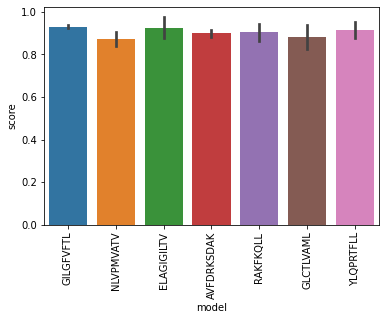

In [38]:
import seaborn as sns

plot = sns.barplot(x="model", y="score", data=scores_df, ci="sd")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
pass

C:\Users\arnod\AppData\Local\Temp/ipykernel_28280/1925603719.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels([f"{baseline+y:.2f}" for y in y_ticks])


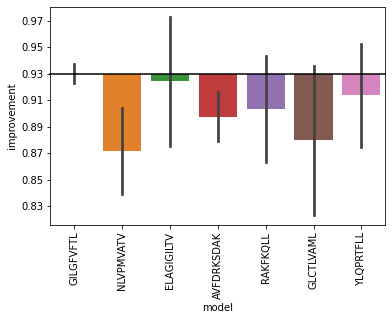

In [36]:
plot = sns.barplot(x="model", y="improvement", data=scores_df, ci="sd")

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot.axhline(0, color="k", clip_on=False)
y_ticks = plot.get_yticks()
plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])
pass

The more occuring epitopes obviously have the advantage of having a lot more train data to work with. Let's try to reduce all number of samples to the same YLQPRTFLL has (2652).

In [23]:
%%capture
from util import split_gene_in_columns, get_features, fix_test, evaluate_no_cv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

scores = pd.DataFrame()
for epitope in most_occuring_epitopes.index:
    try:
        print(f'\nEvaluating eptiope {epitope}...')

        try:
            df = get_epitope_df(epitope, silent=True)
            print(f'Epitope has {len(df)} samples')
        except NotEnoughSamplesException:
            print(f'Error creating dataframe for epitope {epitope}')
            continue

        for seed in range(5):
            reduced_df = df.sample(n=2652, random_state=seed)
            train, test = train_test_split(reduced_df, test_size=0.2, random_state=seed)
            test = test.dropna()

            train_y = train['reaction']
            test_y = test['reaction']
            train_x = get_features(train)
            test_x = get_features(test, test=True)
            test_x = fix_test(test_x, train_x.columns)

            clf = HistGradientBoostingClassifier(random_state=42)
            score = evaluate_no_cv(clf, train_x, train_y, test_x, test_y)
            scores = scores.append({"model": epitope, "score": score}, ignore_index=True)
        # break
    except Exception as e:
        print(f'Error evaluating epitope {epitope}: {e}')
        continue

In [24]:
scores

,model,score
0,GILGFVFTL,0.932960
1,GILGFVFTL,0.919277
2,GILGFVFTL,0.912002
3,GILGFVFTL,0.918175
4,GILGFVFTL,0.870393
5,NLVPMVATV,1.000000
6,NLVPMVATV,NaN
7,NLVPMVATV,0.544444
8,NLVPMVATV,1.000000
9,NLVPMVATV,0.233333


In [25]:
# Take the mean of the values in the dataframe where epitope is GILGFVFTL
baseline = scores[scores['model'] == 'GILGFVFTL']['score'].mean()
scores["improvement"] = scores["score"] - baseline
scores

,model,score,improvement
0,GILGFVFTL,0.932960,0.022398
1,GILGFVFTL,0.919277,0.008715
2,GILGFVFTL,0.912002,0.001441
3,GILGFVFTL,0.918175,0.007614
4,GILGFVFTL,0.870393,-0.040168
5,NLVPMVATV,1.000000,0.089439
6,NLVPMVATV,NaN,NaN
7,NLVPMVATV,0.544444,-0.366117
8,NLVPMVATV,1.000000,0.089439
9,NLVPMVATV,0.233333,-0.677228


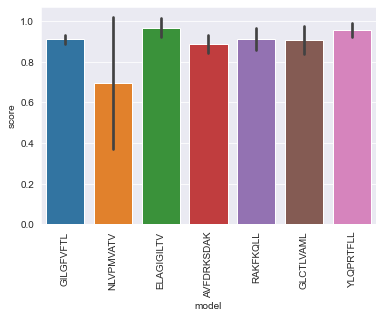

In [27]:
import seaborn as sns
plot = sns.barplot(x="model", y="score", data=scores, ci="sd")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
pass

C:\Users\arnod\AppData\Local\Temp/ipykernel_14732/3001143889.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])


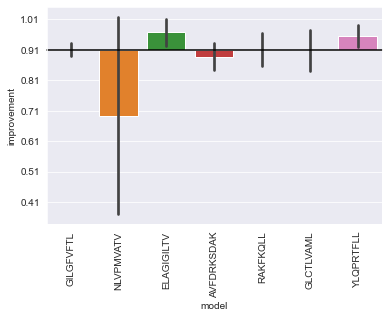

In [28]:
plot = sns.barplot(x="model", y="improvement", data=scores, ci="sd")

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot.axhline(0, color="k", clip_on=False)
y_ticks = plot.get_yticks()
plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])
pass

In [ ]:
TODO: verschil train met missing data en zonder missing data, clf die zo goed op alle ept

In [ ]:
ook kijken naar degene met veel nan data en minder